In [ ]:
# ====================================================
# Multi-City Weather Data Analysis
# A Python project to collect and analyze real-time weather data 
# for multiple cities using OpenWeatherMap API.
# ====================================================


In [2]:
!pip install pandas requests plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 413.0 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]━━━━ 1/2 [plotly]


In [1]:
import requests       # To fetch data from API
import pandas as pd   # To manipulate and store data
import plotly.express as px  # For interactive plots
from datetime import datetime  # To add timestamps
import time           # To simulate real-time data collection
API_KEY = "40b8e5950f1b47fd4756920c6b1d955a"



In [4]:
def get_weather(city):
    """
    Fetch current weather data for a given city using OpenWeatherMap API.
    Returns a dictionary with Time, City, Temperature, Humidity, Wind Speed, and Weather Description.
    """
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    data = response.json()
    
    if response.status_code != 200:
        print(f"Error fetching data for {city}: {data.get('message', 'Unknown error')}")
        return None
    
    weather = {
        "Time": datetime.now().strftime("%H:%M:%S"),
        "City": data['name'],
        "Temperature (°C)": data['main']['temp'],
        "Humidity (%)": data['main']['humidity'],
        "Wind Speed (m/s)": data['wind']['speed'],
        "Weather": data['weather'][0]['description']
    }
    
    return weather


In [3]:
# Test the function with one city
nairobi_weather = get_weather("Nairobi")
print(nairobi_weather)


{'Time': '20:41:29', 'City': 'Nairobi', 'Temperature (°C)': 17.65, 'Humidity (%)': 61, 'Wind Speed (m/s)': 3.84, 'Weather': 'overcast clouds'}


In [7]:
cities = ["Nairobi", "Mombasa", "Kisumu"]  

# List to store weather records
weather_history = []

# Number of updates you want (e.g., 5 times)
num_updates = 5  

# Time interval between updates (in seconds)
interval = 10  

for i in range(num_updates):
    print(f"Update {i+1} of {num_updates}...")
    for city in cities:
        data = get_weather(city)
        if data:
            weather_history.append(data)
    time.sleep(interval)  # Wait before next update

# Convert list of dictionaries to a DataFrame
df_weather = pd.DataFrame(weather_history)
df_weather


Update 1 of 5...
Update 2 of 5...
Update 3 of 5...
Update 4 of 5...
Update 5 of 5...


,Time,City,Temperature (°C),Humidity (%),Wind Speed (m/s),Weather
0,20:44:52,Nairobi,17.65,61,3.84,overcast clouds
1,20:44:53,Mombasa,23.36,84,6.45,scattered clouds
2,20:44:54,Kisumu,21.29,62,1.18,broken clouds
3,20:45:05,Nairobi,17.65,61,3.84,overcast clouds
4,20:45:06,Mombasa,23.36,84,6.45,scattered clouds
5,20:45:06,Kisumu,21.29,62,1.18,broken clouds
6,20:45:17,Nairobi,17.65,61,3.84,overcast clouds
7,20:45:18,Mombasa,23.36,84,6.45,scattered clouds
8,20:45:19,Kisumu,21.29,62,1.18,broken clouds
9,20:45:29,Nairobi,17.65,61,3.84,overcast clouds


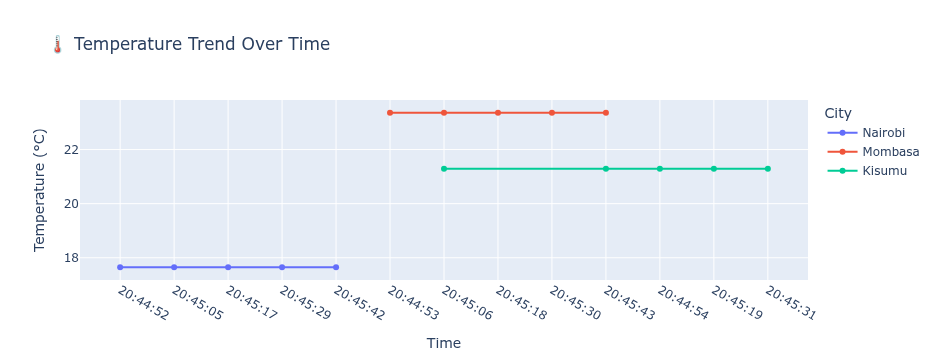

In [8]:
import plotly.express as px

# Temperature trend
fig_temp = px.line(df_weather, 
                   x="Time", 
                   y="Temperature (°C)", 
                   color="City",
                   title="🌡️ Temperature Trend Over Time",
                   markers=True,
                   hover_data=["Humidity (%)", "Wind Speed (m/s)", "Weather"])
fig_temp.show()


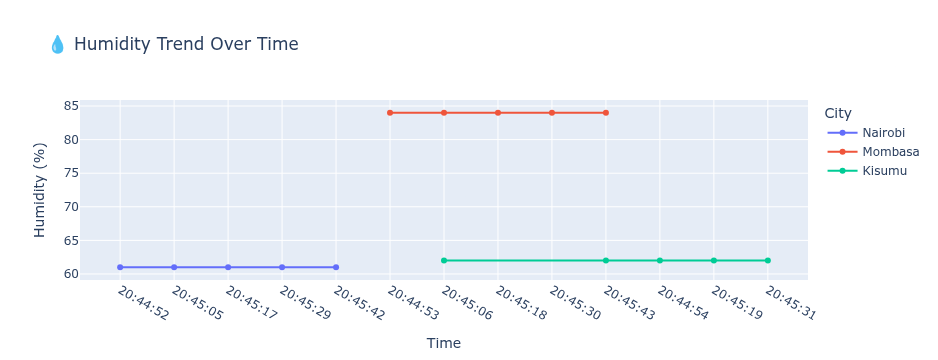

In [9]:
fig_humidity = px.line(df_weather, 
                       x="Time", 
                       y="Humidity (%)", 
                       color="City",
                       title="💧 Humidity Trend Over Time",
                       markers=True,
                       hover_data=["Temperature (°C)", "Wind Speed (m/s)", "Weather"])
fig_humidity.show()


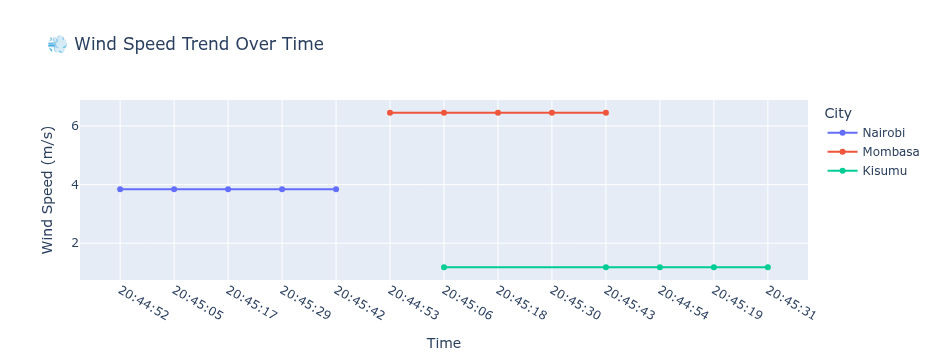

In [10]:
fig_wind = px.line(df_weather, 
                   x="Time", 
                   y="Wind Speed (m/s)", 
                   color="City",
                   title="💨 Wind Speed Trend Over Time",
                   markers=True,
                   hover_data=["Temperature (°C)", "Humidity (%)", "Weather"])
fig_wind.show()


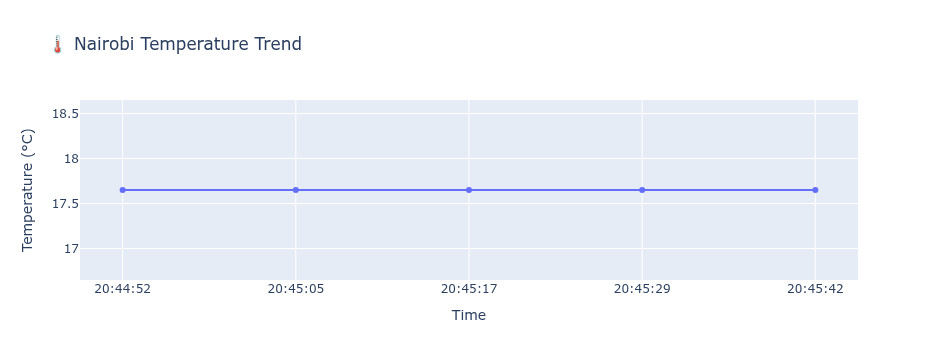

In [11]:
nairobi_df = df_weather[df_weather["City"] == "Nairobi"]

fig = px.line(nairobi_df,
              x="Time",
              y="Temperature (°C)",
              title="🌡️ Nairobi Temperature Trend",
              markers=True,
              hover_data=["Humidity (%)", "Wind Speed (m/s)", "Weather"])
fig.show()


In [14]:
avg_temp = df_weather.groupby("City")["Temperature (°C)"].mean()
avg_humidity = df_weather.groupby("City")["Humidity (%)"].mean()

print("Average Temperatures:\n", avg_temp)
print("\nAverage Humidity:\n", avg_humidity)
print("\nSummary Insights:")
print("✅ Nairobi has moderate temperatures and humidity.")
print("✅ Mombasa is hotter and more humid.")
print("✅ Kisumu has a balanced weather profile.")


Average Temperatures:
 City
Kisumu     21.29
Mombasa    23.36
Nairobi    17.65
Name: Temperature (°C), dtype: float64

Average Humidity:
 City
Kisumu     62.0
Mombasa    84.0
Nairobi    61.0
Name: Humidity (%), dtype: float64

Summary Insights:
✅ Nairobi has moderate temperatures and humidity.
✅ Mombasa is hotter and more humid.
✅ Kisumu has a balanced weather profile.


In [17]:
# Save the collected weather data to CSV
df_weather.to_csv("multi_city_weather_data.csv", index=False)
print("✅ CSV file 'multi_city_weather_data.csv' created successfully!")



✅ CSV file 'multi_city_weather_data.csv' created successfully!


In [16]:
# ====================================================
# ✅ Multi-City Weather Data Analysis – Summary
# ====================================================

print("📊 Project Summary")
print("---------------------------")
print("• Collected real-time weather data for multiple cities (Nairobi, Mombasa, Kisumu)")
print("• Created interactive visualizations for temperature, humidity, and wind speed trends")
print("• Insights:")
print("   - Nairobi: Moderate temperatures and humidity")
print("   - Mombasa: Hotter and more humid")
print("   - Kisumu: Balanced weather profile")
print("• Data saved in 'multi_city_weather_data.csv' for further analysis or reporting")
print("---------------------------")
print("🛠 Tools & Skills Demonstrated:")
print("   - Python (Pandas, Requests, Plotly)")
print("   - API integration and JSON data handling")
print("   - Data analysis, visualization, and reporting")
print("---------------------------")
print("📁 Project is now portfolio-ready for GitHub sharing!")


📊 Project Summary
---------------------------
• Collected real-time weather data for multiple cities (Nairobi, Mombasa, Kisumu)
• Created interactive visualizations for temperature, humidity, and wind speed trends
• Insights:
   - Nairobi: Moderate temperatures and humidity
   - Mombasa: Hotter and more humid
   - Kisumu: Balanced weather profile
• Data saved in 'multi_city_weather_data.csv' for further analysis or reporting
---------------------------
🛠 Tools & Skills Demonstrated:
   - Python (Pandas, Requests, Plotly)
   - API integration and JSON data handling
   - Data analysis, visualization, and reporting
---------------------------
📁 Project is now portfolio-ready for GitHub sharing!
